In [ ]:
%load_ext autoreload
%autoreload 1

In [123]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%aimport forward_thinking
%aimport build_tf_nn

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [124]:
ft = forward_thinking.neural_net(150, 28*28)
epoch_iter = int((len(mnist.train.images)/50)*10)

In [125]:
with tf.Session() as sess:
    #mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
    h1, h1_test, acc, weights = ft.train_first_layer(sess, mnist, iterations=epoch_iter)

step 0, training accuracy 0.04
step 1000, training accuracy 0.88
Epoch Complete
step 2000, training accuracy 0.92
Epoch Complete
step 3000, training accuracy 0.98
Epoch Complete
step 4000, training accuracy 0.92
Epoch Complete
step 5000, training accuracy 0.94
Epoch Complete
step 6000, training accuracy 0.88
Epoch Complete
step 7000, training accuracy 1
Epoch Complete
step 8000, training accuracy 0.94
Epoch Complete
step 9000, training accuracy 0.98
Epoch Complete
step 10000, training accuracy 0.94
First Layer Accuracy 0.958400


In [126]:
with tf.Session() as sess:
    h, h_test, acc, weights = ft.train_next_layer(sess, mnist, h1, h1_test, hidden_nodes=100, iterations=epoch_iter)
    h, h_test, acc, weights = ft.train_next_layer(sess, mnist, h, h_test, hidden_nodes=50, iterations=epoch_iter)
    ft.train_output_layer(sess, mnist, h, h_test, weights, iterations=epoch_iter)

150
step 0, training accuracy 0.2
step 1000, training accuracy 0.86
Epoch Complete
step 2000, training accuracy 0.88
Epoch Complete
step 3000, training accuracy 0.88
Epoch Complete
step 4000, training accuracy 0.96
Epoch Complete
step 5000, training accuracy 0.96
Epoch Complete
step 6000, training accuracy 0.98
Epoch Complete
step 7000, training accuracy 1
Epoch Complete
step 8000, training accuracy 0.98
Epoch Complete
step 9000, training accuracy 0.9
Epoch Complete
step 10000, training accuracy 0.98
Next Layer Accuracy 0.954900
100
step 0, training accuracy 0.1
step 1000, training accuracy 0.92
Epoch Complete
step 2000, training accuracy 0.88
Epoch Complete
step 3000, training accuracy 0.96
Epoch Complete
step 4000, training accuracy 0.96
Epoch Complete
step 5000, training accuracy 0.94
Epoch Complete
step 6000, training accuracy 0.96
Epoch Complete
step 7000, training accuracy 0.92
Epoch Complete
step 8000, training accuracy 0.96
Epoch Complete
step 9000, training accuracy 0.96
Epoch

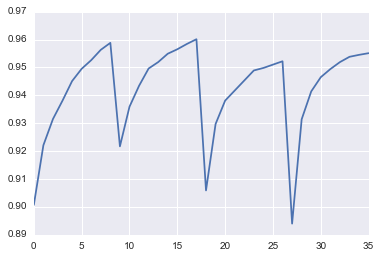

In [112]:
plt.plot(ft.epoch_acc)

In [121]:
nn = build_tf_nn.neural_net(hidden_nodes=[100,100,100])#hidden_nodes=[64,64,64,64])

with tf.Session() as sess:
    print("Training Baseline Network")
    H = nn.train_network(sess, mnist, iterations=epoch_iter*4)

Training Baseline Network
	Setting up training op
	Initializing Variables
	step 0, training accuracy 0.1
	step 1000, training accuracy 0.9
Epoch Complete
	step 2000, training accuracy 0.9
Epoch Complete
	step 3000, training accuracy 0.96
Epoch Complete
	step 4000, training accuracy 0.9
Epoch Complete
	step 5000, training accuracy 0.94
Epoch Complete
	step 6000, training accuracy 1
Epoch Complete
	step 7000, training accuracy 0.96
Epoch Complete
	step 8000, training accuracy 1
Epoch Complete
	step 9000, training accuracy 0.94
Epoch Complete
	step 10000, training accuracy 1
Epoch Complete
	step 11000, training accuracy 0.98
	step 12000, training accuracy 0.96
Epoch Complete
	step 13000, training accuracy 1
Epoch Complete
	step 14000, training accuracy 0.98
Epoch Complete
	step 15000, training accuracy 0.96
Epoch Complete
	step 16000, training accuracy 0.96
Epoch Complete
	step 17000, training accuracy 1
Epoch Complete
	step 18000, training accuracy 0.98
Epoch Complete
	step 19000, traini

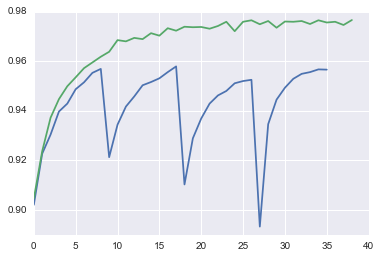

In [127]:
plt.figure()
plt.plot(ft.epoch_acc)
plt.plot(nn.epoch_acc)

In [47]:
ft.weights

[(array([[ 0.09875048,  0.04638739,  0.11082023, ..., -0.17302729,
          -0.012513  , -0.12731248],
         [ 0.01480521,  0.01756078,  0.03904639, ...,  0.04362536,
          -0.12727019,  0.18328808],
         [ 0.19036886, -0.08423377,  0.01533947, ..., -0.09251717,
           0.13443772, -0.14997309],
         ..., 
         [-0.00614307, -0.07430577, -0.15433097, ...,  0.01455531,
           0.05305283,  0.06380794],
         [ 0.06880172,  0.02475941, -0.05463408, ...,  0.15040275,
           0.18399782, -0.1092056 ],
         [ 0.05218841, -0.05362878, -0.03417682, ..., -0.06145218,
           0.07997092,  0.00523493]], dtype=float32),
  array([ 0.09702408,  0.15141852,  0.13041358,  0.15672979,  0.12347355,
          0.11565871,  0.15868324,  0.10660598,  0.09859101,  0.07515085,
          0.18036462,  0.15991062,  0.18238883,  0.10623326,  0.15262067,
          0.10366514,  0.1032773 ,  0.16788724,  0.15108123,  0.15180656,
          0.15985017,  0.13749632,  0.13888045, 